In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings('ignore')

## Create a Dataset

In [2]:
X, y = make_classification(n_samples=1000, n_features=2, n_classes=2,
                           n_clusters_per_class=2, n_redundant=0)

<Axes: xlabel='0', ylabel='1'>

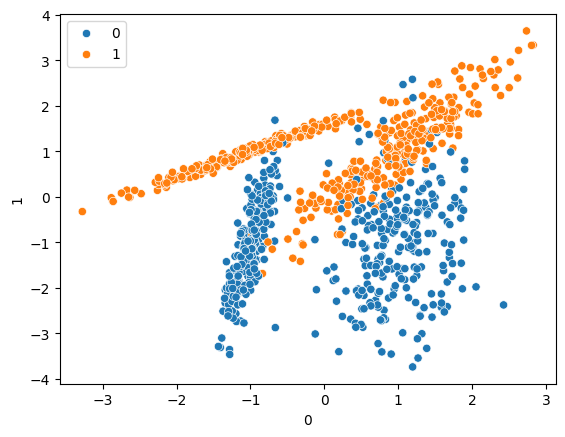

In [3]:
sns.scatterplot(x=pd.DataFrame(X)[0], y=pd.DataFrame(X)[1], hue=y)

## Train Test Split

In [4]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10)

## Model Training

In [5]:
model = SVC(kernel='linear')

In [6]:
model.fit(X_train, y_train)

SVC(kernel='linear')

## Predictions

In [7]:
y_pred = model.predict(X_test)

## Evaluation

In [8]:
accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.828


In [9]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83       128
           1       0.80      0.86      0.83       122

    accuracy                           0.83       250
   macro avg       0.83      0.83      0.83       250
weighted avg       0.83      0.83      0.83       250



<Axes: >

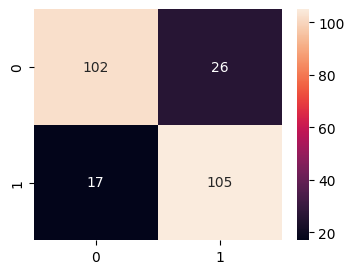

In [10]:
plt.figure(figsize=(4,3))
matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
sns.heatmap(matrix, annot=True, fmt='1.0f')

## RBF Kernel

In [11]:
model_rbf = SVC(kernel='rbf')
model_rbf.fit(X_train, y_train)
y_pred_rbf = model_rbf.predict(X_test)

In [12]:
accuracy = accuracy_score(y_true=y_test, y_pred=y_pred_rbf)
print(f"Accuracy: {accuracy}")
print(classification_report(y_true=y_test, y_pred=y_pred_rbf))

Accuracy: 0.9
              precision    recall  f1-score   support

           0       0.94      0.86      0.90       128
           1       0.86      0.94      0.90       122

    accuracy                           0.90       250
   macro avg       0.90      0.90      0.90       250
weighted avg       0.90      0.90      0.90       250



<Axes: >

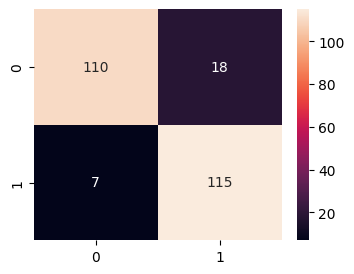

In [13]:
plt.figure(figsize=(4,3))
matrix = confusion_matrix(y_true=y_test, y_pred=y_pred_rbf)
sns.heatmap(matrix, annot=True, fmt='1.0f')

## Polynomial Kernel

In [14]:
model_polynomial = SVC(kernel='poly')
model_polynomial.fit(X_train, y_train)
y_pred_polynomial = model_polynomial.predict(X_test)

In [15]:
accuracy = accuracy_score(y_true=y_test, y_pred=y_pred_polynomial)
print(f"Accuracy: {accuracy}")
print(classification_report(y_true=y_test, y_pred=y_pred_polynomial))

Accuracy: 0.848
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       128
           1       0.88      0.80      0.84       122

    accuracy                           0.85       250
   macro avg       0.85      0.85      0.85       250
weighted avg       0.85      0.85      0.85       250



<Axes: >

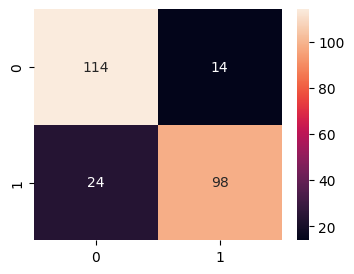

In [16]:
plt.figure(figsize=(4,3))
matrix = confusion_matrix(y_true=y_test, y_pred=y_pred_polynomial)
sns.heatmap(matrix, annot=True, fmt='1.0f')

## Sigmoid Kernel

In [17]:
model_sigmoid = SVC(kernel='sigmoid')
model_sigmoid.fit(X_train, y_train)
y_pred_sigmoid = model_sigmoid.predict(X_test)

In [18]:
accuracy = accuracy_score(y_true=y_test, y_pred=y_pred_sigmoid)
print(f"Accuracy: {accuracy}")
print(classification_report(y_true=y_test, y_pred=y_pred_sigmoid))

Accuracy: 0.688
              precision    recall  f1-score   support

           0       0.70      0.69      0.69       128
           1       0.68      0.69      0.68       122

    accuracy                           0.69       250
   macro avg       0.69      0.69      0.69       250
weighted avg       0.69      0.69      0.69       250



<Axes: >

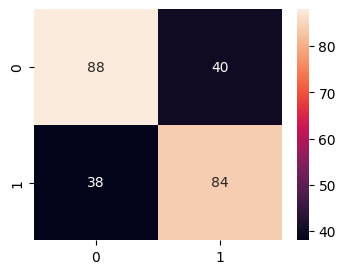

In [19]:
plt.figure(figsize=(4,3))
matrix = confusion_matrix(y_true=y_test, y_pred=y_pred_sigmoid)
sns.heatmap(matrix, annot=True, fmt='1.0f')

## Hyperparameter Tuning

In [20]:
model = SVC()
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
}

In [21]:
grid_model = GridSearchCV(
    estimator=model, param_grid=param_grid, cv=5, verbose=3,
    refit=True
)

In [22]:
grid_model.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.940 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.880 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.860 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.920 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.887 total time=   0.0s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.967 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.933 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.907 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.913 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.933 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.900 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=pol

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             verbose=3)

In [23]:
grid_model.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

In [24]:
y_pred = grid_model.predict(X_test)
accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_true=y_test, y_pred=y_pred))

Accuracy: 0.924
              precision    recall  f1-score   support

           0       0.96      0.89      0.92       128
           1       0.89      0.96      0.92       122

    accuracy                           0.92       250
   macro avg       0.93      0.92      0.92       250
weighted avg       0.93      0.92      0.92       250



<Axes: >

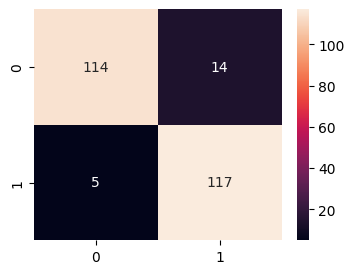

In [25]:
plt.figure(figsize=(4,3))
matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
sns.heatmap(matrix, annot=True, fmt='1.0f')